In [1]:
# Imports
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from timeit import default_timer as timer

plt.rcParams["figure.figsize"] = (20,10)

In [5]:
# Parameters 
# ATTEMPT_NAME="LSTM_BASELINE"
# DATASET_FILE_PATH= ["Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx"]
# DATASET_SHEET_TITLE= ["data_uniforma", "data_uniformb", "data_uniformc", "data_uniformd", "data_uniforme"]
# GRANULARITY=10
# STEP_SIZE_SLIDING_WINDOW=5
# PAST_HISTORY=20
# FUTURE_TARGET=1
# VAL_PERCENT=0.1
# EPOCHS=5
# BATCH_SIZE=10
# SMOOTHING=50
# SHUFFLE_BUFFER_SIZE=100
# MEAN=False

In [6]:
def run_all(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, PAST_HISTORY, 
            FUTURE_TARGET, VAL_PERCENT, EPOCHS, BATCH_SIZE, SMOOTHING, ATTEMPT_NAME, SHUFFLE_BUFFER_SIZE, MEAN): 
    batch_train, batch_val, batch_test, test_ground_truth, train_slices, val_slices, test_data_indexes, data_shape = process_data(
        DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, SMOOTHING, ATTEMPT_NAME, VAL_PERCENT, PAST_HISTORY, 
        FUTURE_TARGET, STEP_SIZE_SLIDING_WINDOW, BATCH_SIZE, EPOCHS, SHUFFLE_BUFFER_SIZE, MEAN)
    model, training_history, training_time = run_lstm(data_shape, batch_train, batch_val, train_slices, 
                                                      val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET) 
    evaluate_results(model, training_history, test_ground_truth, batch_test, test_data_indexes, training_time)

In [2]:
# Load algorithm
%run ./data_management_component.ipynb

In [3]:
%run ./nn_baseline.ipynb

In [4]:
%run ./evaluation_component.ipynb

In [11]:
ATTEMPT_NAME="NN_BASELINE"
DATASET_FILE_PATH= ["Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx"]
DATASET_SHEET_TITLE= ["data_uniforma", "data_uniformb", "data_uniformc", "data_uniformd", "data_uniforme"]
GRANULARITY=10
STEP_SIZE_SLIDING_WINDOW=5
PAST_HISTORY=20
FUTURE_TARGET=1
VAL_PERCENT=0.1
EPOCHS=5
BATCH_SIZE=10
SMOOTHING=50
SHUFFLE_BUFFER_SIZE=100
MEAN=False

In [6]:
batch_train, batch_val, batch_test, test_ground_truth, train_slices, val_slices, test_data_indexes, data_shape = process_data(
        DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, SMOOTHING, ATTEMPT_NAME, VAL_PERCENT, PAST_HISTORY, 
        FUTURE_TARGET, STEP_SIZE_SLIDING_WINDOW, BATCH_SIZE, EPOCHS, SHUFFLE_BUFFER_SIZE, MEAN)

Working on dataset: Datasets\uniformdata.xlsx data_uniforma TRAIN SET number 0
(4430, 4, 8) (474, 4, 8)
4430 0
Working on dataset: Datasets\uniformdata.xlsx data_uniformb TRAIN SET number 1
(3467, 4, 8) (367, 4, 8)
7897 474
Working on dataset: Datasets\uniformdata.xlsx data_uniformc TRAIN SET number 2
(3596, 4, 8) (381, 4, 8)
11493 841
Working on dataset: Datasets\uniformdata.xlsx data_uniformd TRAIN SET number 3
(3925, 4, 8) (418, 4, 8)
15418 1222
Working on dataset: Datasets\uniformdata.xlsx data_uniforme TEST SET


In [18]:
%run ./nn_baseline.ipynb

In [19]:
DENSE_SIZE = 200
DENSE_LAYER_NUM = 5
model, training_history, training_time = run_nn(data_shape, batch_train, batch_val, train_slices, 
                                                  val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET, DENSE_SIZE, DENSE_LAYER_NUM) 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               6600      
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_7 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

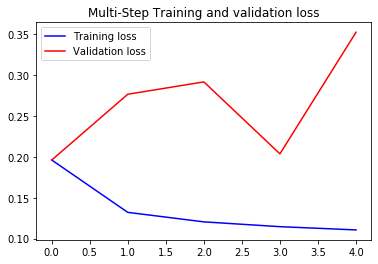

4172/4172 [==============================] - 13s 3ms/step - loss: 0.2971 - mae: 0.2971 - mape: 127.4992 - mse: 0.1228
Total training time: 48.42507320000027 seconds
Execution time: time 204.51486160000013, observations 4172, time per observation 0.04902082013422822 seconds


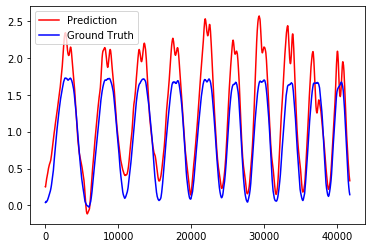

In [20]:
%run ./evaluation_component.ipynb
evaluate_results(model, training_history, test_ground_truth, batch_test, test_data_indexes, training_time)

In [15]:
ATTEMPT_NAME="LSTM_BASELINE"
DATASET_FILE_PATH= ["Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx"]
DATASET_SHEET_TITLE= ["data_uniforma", "data_uniformb", "data_uniformc", "data_uniformd", "data_uniforme"]
GRANULARITY=10
STEP_SIZE_SLIDING_WINDOW=5
PAST_HISTORY=20
FUTURE_TARGET=1
VAL_PERCENT=0.1
EPOCHS=5
BATCH_SIZE=10
SMOOTHING=1
SHUFFLE_BUFFER_SIZE=0
MEAN=False

run_all(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, PAST_HISTORY, 
        FUTURE_TARGET, VAL_PERCENT, EPOCHS, BATCH_SIZE, SMOOTHING, ATTEMPT_NAME, SHUFFLE_BUFFER_SIZE, MEAN)

In [ ]:
ATTEMPT_NAME="LSTM_SHUFFLE"
DATASET_FILE_PATH= ["Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx"]
DATASET_SHEET_TITLE= ["data_uniforma", "data_uniformb", "data_uniformc", "data_uniformd", "data_uniforme"]
GRANULARITY=10
STEP_SIZE_SLIDING_WINDOW=5
PAST_HISTORY=20
FUTURE_TARGET=1
VAL_PERCENT=0.1
EPOCHS=5
BATCH_SIZE=10
SMOOTHING=1
SHUFFLE_BUFFER_SIZE=100
MEAN=False

run_all(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, PAST_HISTORY, 
            FUTURE_TARGET, VAL_PERCENT, EPOCHS, BATCH_SIZE, SMOOTHING, ATTEMPT_NAME, SHUFFLE_BUFFER_SIZE, MEAN)

In [ ]:
ATTEMPT_NAME="LSTM_HIGH_EPOCH"
DATASET_FILE_PATH= ["Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx"]
DATASET_SHEET_TITLE= ["data_uniforma", "data_uniformb", "data_uniformc", "data_uniformd", "data_uniforme"]
GRANULARITY=10
STEP_SIZE_SLIDING_WINDOW=5
PAST_HISTORY=20
FUTURE_TARGET=1
VAL_PERCENT=0.1
EPOCHS=20
BATCH_SIZE=10
SMOOTHING=1
SHUFFLE_BUFFER_SIZE=0
MEAN=False

run_all(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, PAST_HISTORY, 
            FUTURE_TARGET, VAL_PERCENT, EPOCHS, BATCH_SIZE, SMOOTHING, ATTEMPT_NAME, SHUFFLE_BUFFER_SIZE, MEAN)

In [ ]:
ATTEMPT_NAME="LSTM_LARGE_PAST_HISTORY"
DATASET_FILE_PATH= ["Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx"]
DATASET_SHEET_TITLE= ["data_uniforma", "data_uniformb", "data_uniformc", "data_uniformd", "data_uniforme"]
GRANULARITY=10
STEP_SIZE_SLIDING_WINDOW=5
PAST_HISTORY=100
FUTURE_TARGET=1
VAL_PERCENT=0.1
EPOCHS=5
BATCH_SIZE=10
SMOOTHING=1
SHUFFLE_BUFFER_SIZE=0
MEAN=False

run_all(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, PAST_HISTORY, 
            FUTURE_TARGET, VAL_PERCENT, EPOCHS, BATCH_SIZE, SMOOTHING, ATTEMPT_NAME, SHUFFLE_BUFFER_SIZE, MEAN)

In [ ]:
ATTEMPT_NAME="LSTM_SMOOTHING"
DATASET_FILE_PATH= ["Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx"]
DATASET_SHEET_TITLE= ["data_uniforma", "data_uniformb", "data_uniformc", "data_uniformd", "data_uniforme"]
GRANULARITY=10
STEP_SIZE_SLIDING_WINDOW=5
PAST_HISTORY=20
FUTURE_TARGET=1
VAL_PERCENT=0.1
EPOCHS=5
BATCH_SIZE=10
SMOOTHING=50
SHUFFLE_BUFFER_SIZE=0
MEAN=False

run_all(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, PAST_HISTORY, 
            FUTURE_TARGET, VAL_PERCENT, EPOCHS, BATCH_SIZE, SMOOTHING, ATTEMPT_NAME, SHUFFLE_BUFFER_SIZE, MEAN)

In [1]:
ATTEMPT_NAME="LSTM_MEAN"
DATASET_FILE_PATH= ["Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx"]
DATASET_SHEET_TITLE= ["data_uniforma", "data_uniformb", "data_uniformc", "data_uniformd", "data_uniforme"]
GRANULARITY=10
STEP_SIZE_SLIDING_WINDOW=5
PAST_HISTORY=20
FUTURE_TARGET=1
VAL_PERCENT=0.1
EPOCHS=5
BATCH_SIZE=10
SMOOTHING=1
SHUFFLE_BUFFER_SIZE=0
MEAN=True

run_all(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, PAST_HISTORY, 
            FUTURE_TARGET, VAL_PERCENT, EPOCHS, BATCH_SIZE, SMOOTHING, ATTEMPT_NAME, SHUFFLE_BUFFER_SIZE, MEAN)

NameError: name 'run_all' is not defined

In [ ]:
ATTEMPT_NAME="CNN_BASELINE"
DATASET_FILE_PATH= ["Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx"]
DATASET_SHEET_TITLE= ["data_uniforma", "data_uniformb", "data_uniformc", "data_uniformd", "data_uniforme"]
GRANULARITY=10
STEP_SIZE_SLIDING_WINDOW=5
PAST_HISTORY=200           # PASTHISTORY/STEPSIZE NEEDS TO BE LARGER THAN KERNEL SIZE OF CNN
FUTURE_TARGET=1
VAL_PERCENT=0.1
EPOCHS=5
BATCH_SIZE=10
SMOOTHING=50
SHUFFLE_BUFFER_SIZE=100
MEAN=False